In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from calcul_structure import *

In [2]:
## Propriété materiaux [N, m]
E = 1
I = 1
A = 1

#Element 1
L=1

# Ligne Influence Moment flechissant en  E
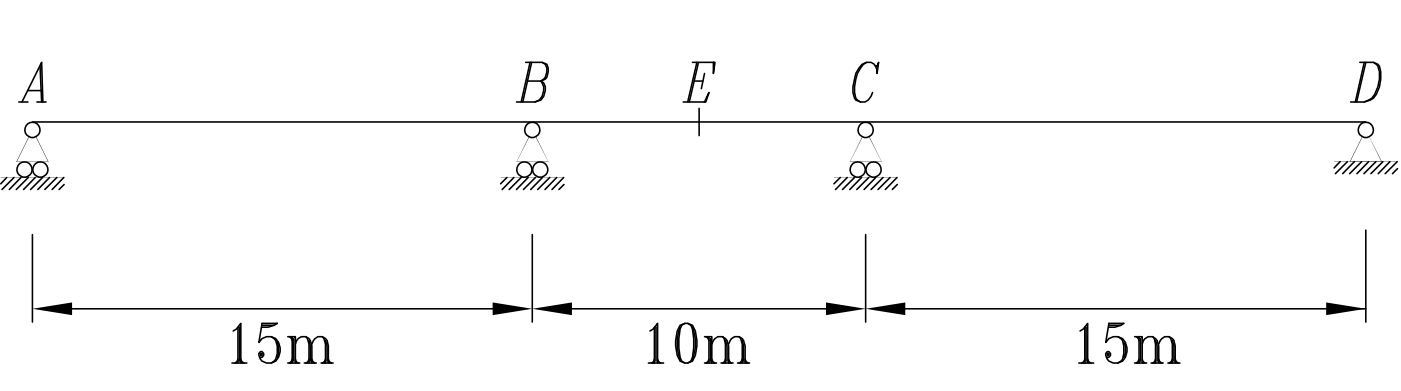

In [3]:
# Coordonnée éléments
XY = np.array([
     [0, 0], # Appui A
     [1, 0],
     [2, 0],
     [3, 0],
     [4, 0],
     [5, 0],
     [6, 0],
     [7, 0],#Appui F
     [7, 0],#Appui F (Dupliqué)
     [8, 0],
     [9, 0],
     [10,0],
     [11, 0],
     [12, 0],
     [13, 0],
     [14, 0],
     [15, 0], # Appui B
     [16, 0],
     [17, 0],
     [18, 0],
     [19, 0],
     [20,0], # Point E
     [21,0],
     [22,0],
     [23,0],
     [24,0],
     [25,0], # Appui C
     [26,0],
     [27,0],
     [28,0],
     [29,0],
     [30,0],
     [31,0],
     [32,0],
     [33,0],
     [34,0],
     [35,0],
     [36,0],
     [37,0],
     [38,0],
     [39,0],
     [40,0], # Appui D
])

In [4]:
#Matrice de rigidité élémentaire en coordonnées locales
# Discretisation de la poutre en 8 element de longeur 5 m
mat_elem_local_1 = matrice_elementaire(E, I, A, L) # Matrice de rigidité Element 1

print(mat_elem_local_1)

[[  1.   0.   0.  -1.   0.   0.]
 [  0.  12.   6.   0. -12.   6.]
 [  0.   6.   4.   0.  -6.   2.]
 [ -1.   0.   0.   1.   0.   0.]
 [  0. -12.  -6.   0.  12.  -6.]
 [  0.   6.   2.   0.  -6.   4.]]


In [5]:
#Matrice de rotatio
rot_elem_1 = rotation_matrice(0) # Rotation Element 1

In [6]:
#Matrice de rigidité élémentaire en coordonnées locales
mat_elem_global_1 = np.matmul(np.matmul(np.transpose(rot_elem_1),mat_elem_local_1), rot_elem_1) # Matrice de rigidité Element 1

In [8]:
# Connection entre élément
# Degré de liberte de chaque élément de la forme
# LM[:, i] = [Uxi, Uyi, Thetai, Uxj, Uyj, Thetaj]
# Travée 1
LM = np.zeros((6, 41), dtype=int)
LM[:,0] =  [0, 0, 38, 0, 1, 39]
LM[:,1] =  [0, 1, 39, 0, 2, 40]    
LM[:,2] =  [0, 2, 40, 0, 3, 41]   
LM[:,3] =  [0, 3, 41, 0, 4, 42]
LM[:,4] =  [0, 4, 42, 0, 5, 43]   
LM[:,5] =  [0, 5, 43, 0, 6, 44]
LM[:,6] =  [0, 6, 44, 0, 7, 45]
#Les degré de liberté en rotation sont différents
LM[:,7] =  [0, 7,  46, 0, 8, 47]
LM[:,8] =  [0, 8,  47, 0, 9, 48]
LM[:,9] =  [0, 9,  48, 0, 10, 49]
LM[:,10] = [0, 10, 49, 0, 11, 50]
LM[:,11] = [0, 11, 50, 0, 12, 51]
LM[:,12] = [0, 12, 51, 0, 13, 52]
LM[:,13] = [0, 13, 52, 0, 14, 53]
LM[:,14] = [0, 14, 53, 0, 0, 54]

#Travée 2
LM[:,15] = [0, 0,  54, 0, 15, 55]
LM[:,16] = [0, 15, 55, 0, 16, 56]
LM[:,17] = [0, 16, 56, 0, 17, 57]
LM[:,18] = [0, 17, 57, 0, 18, 58]
LM[:,19] = [0, 18, 58, 0, 19, 59]
LM[:,20] = [0, 19, 59, 0, 20, 60]
LM[:,21] = [0, 20, 60, 0, 21, 61]
LM[:,22] = [0, 21, 61, 0, 22, 62]
LM[:,23] = [0, 22, 62, 0, 23, 63]
LM[:,24] = [0, 23, 63, 0, 0, 64]

#Travée 3
LM[:,25] = [0, 0, 64, 0, 24, 65]
LM[:,26] = [0, 24,65, 0, 25, 66]
LM[:,27] = [0, 25,66, 0, 26, 67]
LM[:,28] = [0, 26,67, 0, 27, 68]
LM[:,29] = [0, 27,68, 0, 28, 69]
LM[:,30] = [0, 28,69, 0, 29, 70]
LM[:,31] = [0, 29,70, 0, 30, 71]
LM[:,32] = [0, 30,71, 0, 31, 72]
LM[:,33] = [0, 31,72, 0, 32, 73]
LM[:,34] = [0, 32,73, 0, 33, 74]
LM[:,35] = [0, 33,74, 0, 34, 75]
LM[:,36] = [0, 34,75, 0, 35, 76]
LM[:,37] = [0, 35,76, 0, 36, 77]
LM[:,38] = [0, 36,77, 0, 37, 78]
LM[:,39] = [0, 37,78, 0, 0,  79]

print(LM)


[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14  0 15 16 17 18 19 20 21 22
  23  0 24 25 26 27 28 29 30 31 32 33 34 35 36 37  0]
 [38 39 40 41 42 43 44 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62
  63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14  0 15 16 17 18 19 20 21 22 23
   0 24 25 26 27 28 29 30 31 32 33 34 35 36 37  0  0]
 [39 40 41 42 43 44 45 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
  64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79  0]]


In [9]:
# Assemblage de la matrice de rigidité
# Assemblage de la matrice de rigidité
K_global_2 = np.zeros((79, 79), dtype=np.float32)

for i in range(40):
    K_global_2 = assemblage_matrice_rigidite(LM, i, K_global_2, mat_elem_global_1)

print(K_global_2.shape)
np.linalg.inv(K_global_2)

(79, 79)


array([[ 9.115646 , 17.540817 , 25.251701 , ..., -0.5409524, -0.5638095,
        -0.5714286],
       [17.540817 , 34.367348 , 49.931973 , ..., -1.0819048, -1.127619 ,
        -1.1428572],
       [25.251701 , 49.931973 , 73.46939  , ..., -1.6228571, -1.6914285,
        -1.7142857],
       ...,
       [-0.5409524, -1.0819048, -1.6228571, ...,  2.5945334,  2.4661334,
         2.4233334],
       [-0.5638095, -1.127619 , -1.6914285, ...,  2.4661334,  3.3365333,
         3.2933333],
       [-0.5714286, -1.1428572, -1.7142857, ...,  2.4233334,  3.2933333,
         4.25     ]], dtype=float32)

In [13]:
#Vecteur de Force Nodale
P_global    = np.zeros(79)
P_global[44] = 1
P_global[45] = -1
print(P_global)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  1. -1.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.]


In [14]:
#Solution 
U = np.linalg.solve(K_global_2, P_global)
print(U[0:38])

[ 14.2585034   28.65986395  43.34693878  58.46258503  74.14965986
  90.55102041 107.80952381  89.33333333  72.          55.95238095
  41.33333333  28.28571429  16.95238095   7.47619048  -5.4
  -8.91428571 -10.8        -11.31428571 -10.71428571  -9.25714286
  -7.2         -4.8         -2.31428571   1.93333333   3.46666667
   4.62857143   5.44761905   5.95238095   6.17142857   6.13333333
   5.86666667   5.4          4.76190476   3.98095238   3.08571429
   2.1047619    1.06666667  14.23469388]


In [15]:
# Line d'Influence Muller-Breslaut
M1 = U[44]
M2 = U[45]


LI  = U/(abs(M1) + abs(M2)) #changer le signe de M2 et M2 pour une somme en valeur absolue
print(LI)


[ 3.88148148e-01  7.80185185e-01  1.18000000e+00  1.59148148e+00
  2.01851852e+00  2.46500000e+00  2.93481481e+00  2.43185185e+00
  1.96000000e+00  1.52314815e+00  1.12518519e+00  7.70000000e-01
  4.61481481e-01  2.03518519e-01 -1.47000000e-01 -2.42666667e-01
 -2.94000000e-01 -3.08000000e-01 -2.91666667e-01 -2.52000000e-01
 -1.96000000e-01 -1.30666667e-01 -6.30000000e-02  5.26296296e-02
  9.43703704e-02  1.26000000e-01  1.48296296e-01  1.62037037e-01
  1.68000000e-01  1.66962963e-01  1.59703704e-01  1.47000000e-01
  1.29629630e-01  1.08370370e-01  8.40000000e-02  5.72962963e-02
  2.90370370e-02  3.87500000e-01  3.89444444e-01  3.95277778e-01
  4.05000000e-01  4.18611111e-01  4.36111111e-01  4.57500000e-01
  4.82777778e-01 -5.17222222e-01 -4.88055556e-01 -4.55000000e-01
 -4.18055556e-01 -3.77222222e-01 -3.32500000e-01 -2.83888889e-01
 -2.31388889e-01 -1.75000000e-01 -1.20166667e-01 -7.23333333e-02
 -3.15000000e-02  2.33333333e-03  2.91666667e-02  4.90000000e-02
  6.18333333e-02  6.76666

[26 27 28 29 30 31 32 33 34 35 36 37 38 39]
[ 0.          0.38814815  0.78018519  1.18        1.59148148  2.01851852
  2.465       2.93481481  2.93481481  2.43185185  1.96        1.52314815
  1.12518519  0.77        0.46148148  0.20351852  0.         -0.147
 -0.24266667 -0.294      -0.308      -0.29166667 -0.252      -0.196
 -0.13066667 -0.063       0.          0.05262963  0.09437037  0.126
  0.1482963   0.16203704  0.168       0.16696296  0.1597037   0.147
  0.12962963  0.10837037  0.084       0.0572963   0.02903704  0.        ]


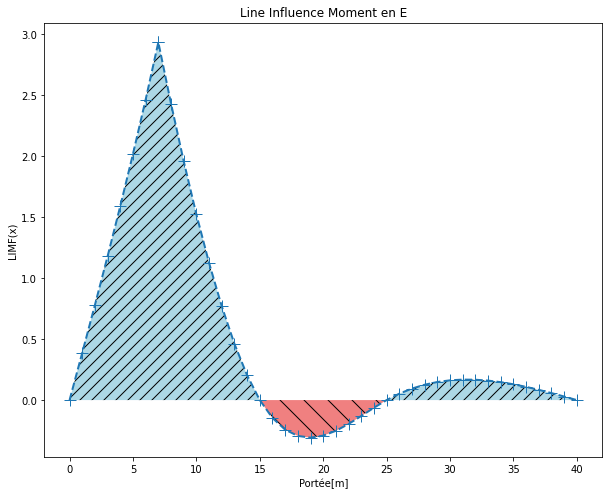

In [38]:
# Tracée ligne Influence
# Create the scatter plot
scale_factor = 1
x = scale_factor*XY[:, 0]
y = np.zeros((42,))
# Noeud 0, 1, 2
y[0]    = 0
y[1:7] = LI[0:6]
y[7] = LI[6]
y[8:16] = LI[6:14]

# Noeud 3 : Reaction appui, valeur deplacement vertical 0 
y[16] = 0
# # # Noeud 4 : Point E
y[17:26] = LI[14:23] #(2, 3)
y[26] = 0
# # # Noeud 5, 6
y[27:41] = LI[23:37] #(4, 5)
# # # Noeud 7 reaction appui 0
y[41] = 0
print(y)
plt.figure(figsize=(10,8))
plt.plot(x, y, '+--', linewidth=2, markersize=12)
# Fill the area above the line with a hashed pattern
plt.fill_between(x, y, np.zeros_like(y), where=(y >= 0), facecolor='lightblue', hatch='//')

# Fill the area below the line with a different hashed pattern
plt.fill_between(x, y, np.zeros_like(y), where=(y <= 0),  facecolor='lightcoral', hatch='\\')

# Add labels and title
plt.xlabel("Portée[m]")
plt.ylabel("LIMF(x)")
plt.title("Line Influence Moment en E")

# Show the plot
plt.show()